Création de bruit de différents types

In [1]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

In [2]:
import matplotlib.pyplot as plt

my_img = cv2.imread('test_2.png')
cv2.imwrite('test_2_bruit_2.png',
            noisy("poisson",my_img))

True

In [3]:
import random
import cv2
 
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('test_2.png',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('test_2_bruit.png',
            add_noise(img))

True

Filtre gaussien et médian + hist equi

36.95011273472475
33.61188665373196


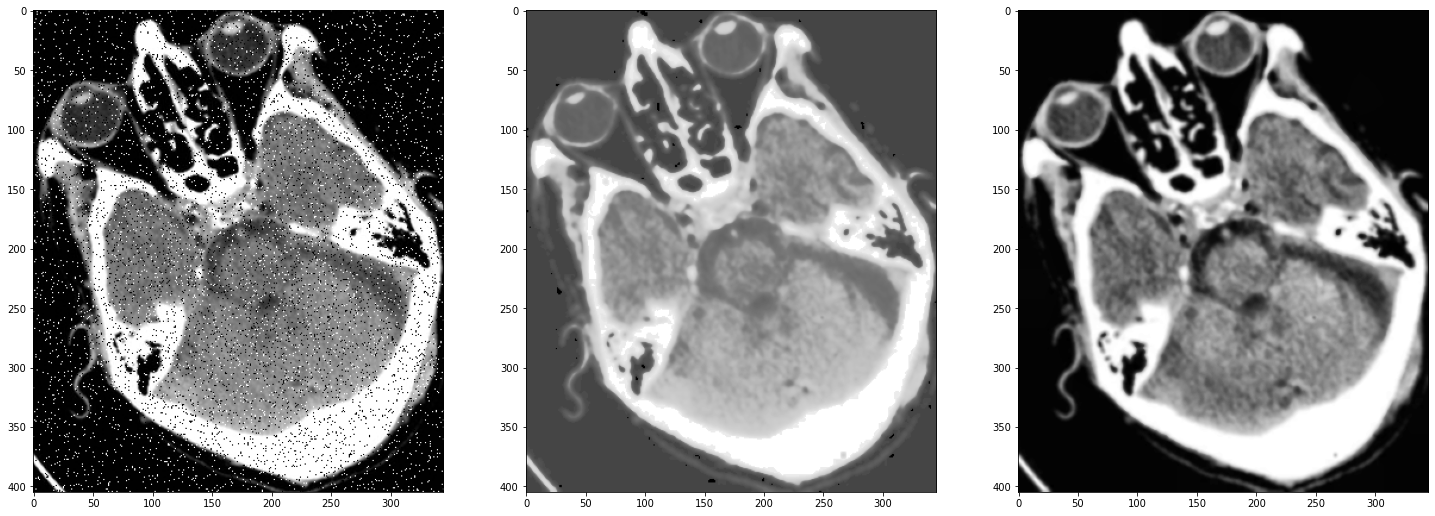

In [7]:
import cv2
import numpy as np
from IPython.display import display, Math, Latex
from math import log10, sqrt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

my_img = cv2.imread('test_2_bruit.png',0)

median = cv2.medianBlur(my_img, 3)
gauss = cv2.GaussianBlur(median, (5,5), 0)


def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main():
     original = cv2.imread("original_image.png")
     compressed = cv2.imread("compressed_image.png", 1)
     value = PSNR(original, compressed)
     print(f"PSNR value is {value} dB")
       
print(PSNR(my_img,median))
print(PSNR(my_img,gauss))


"""
original = my_img.copy()
xp = [0, 64, 128, 192, 255]
fp = [0, 16, 128, 240, 255]
x = np.arange(256)
table = np.interp(x, xp, fp).astype('uint8')
img = cv2.LUT(gauss, table)
cv2.imshow("original", original)
cv2.imshow("Output", img)
cv2.waitKey(0)
cv2.destroyAllWindows() 
"""

img1 = np.asarray(gauss)

# put pixels in a 1D array by flattening out img array
flat = img1.flatten()

# show the histogram
#plt.hist(flat, bins=50)

def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)

def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
#plt.plot(cs)

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

#plt.plot(cs)

img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img1.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(25)


clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(gauss)


fig.add_subplot(1,3,1)
plt.imshow(my_img, cmap='gray')

# display the new image
fig.add_subplot(1,3,2)
plt.imshow(img_new, cmap='gray')

fig.add_subplot(1,3,3)
plt.imshow(cl1, cmap='gray')

plt.show(block=True)


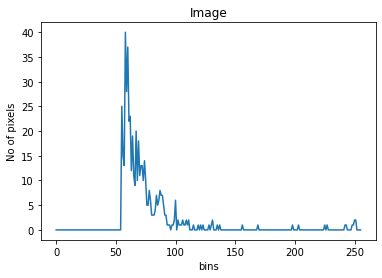

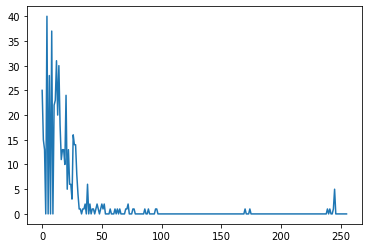

True

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img= cv2.imread('test_3.png')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.title("Image")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()


gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

cv2.imshow("Image",gray_img_eqhist)
cv2.waitKey(0)
cv2.destroyAllWindows()

clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
cv2.imshow("Image",gray_img_clahe)
cv2.waitKey(0)
cv2.destroyAllWindows()


th=80
max_val=255
ret, o1 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY)
cv2.putText(o1,"Thresh_Binary",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o2 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_BINARY_INV)
cv2.putText(o2,"Thresh_Binary_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o3 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO)
cv2.putText(o3,"Thresh_Tozero",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o4 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TOZERO_INV)
cv2.putText(o4,"Thresh_Tozero_inv",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret, o5 = cv2.threshold(gray_img_clahe, th, max_val, cv2.THRESH_TRUNC)
cv2.putText(o5,"Thresh_trunc",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)
ret ,o6=  cv2.threshold(gray_img_clahe, th, max_val,  cv2.THRESH_OTSU)
cv2.putText(o6,"Thresh_OSTU",(40,100),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),3,cv2.LINE_AA)

final=np.concatenate((o1,o2,o3),axis=1)
final1=np.concatenate((o4,o5,o6),axis=1)

cv2.imwrite("Image1.jpg",final)
cv2.imwrite("Image2.jpg",final1)


gray_image = cv2.imread('test_3.png',0)
thresh1 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh2 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
thresh3 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 5)
thresh4 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 4)

final=np.concatenate((thresh1,thresh2,thresh3,thresh4),axis=1)
cv2.imwrite('rect.jpg',final)


In [9]:
import cv2
import numpy as np

my_img = cv2.imread('test_2_bruit.png', 0)
median = cv2.medianBlur(my_img, 3)
equ = cv2.equalizeHist(median)
res = np.hstack((my_img, equ))

cv2.imshow('image', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

66.6284908340844


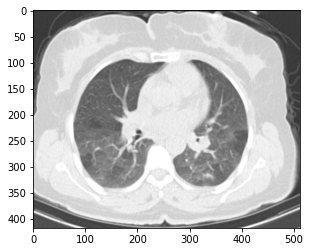

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('test_3_bruit_2.png')
dst = cv2.fastNlMeansDenoising(image, h=1, templateWindowSize=7)
print(PSNR(image,dst))
plt.imshow(dst, cmap='gray')
plt.show()


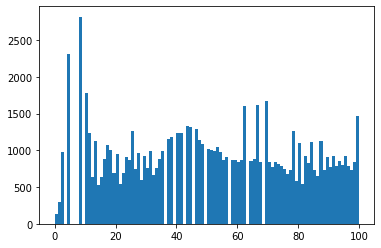

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('test_3_bruit_2.png',0)

median = cv2.medianBlur(img, 3)
gauss = cv2.GaussianBlur(median, (5,5), 0)
equ = cv2.equalizeHist(gauss)

plt.hist(equ.flat, bins=100, range=(0,100))

cv2.imshow("Original Image", img)
cv2.imshow("Equalized", equ)


#Histogram Equalization considers the global contrast of the image, may not give good results.
#Adaptive histogram equalization divides images into small tiles and performs hist. eq.
#Contrast limiting is also applied to minimize aplification of noise.
#Together the algorithm is called: Contrast Limited Adaptive Histogram Equalization (CLAHE)

# Start by creating a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))  #Define tile size and clip limit. 
cl1 = clahe.apply(gauss)

cv2.imshow("CLAHE", cl1)

cv2.waitKey(0)          
cv2.destroyAllWindows() 


